### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1.	Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2.	Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3.	blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4.	blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5.	blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6.	blueKills : Jumlah musuh yang dibunuh oleh tim biru
7.	blueDeaths : Jumlah kematian (tim biru)
8.	blueAssists : Jumlah assist kill (tim biru)
9.	blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10.	blueDragons : Jumlah naga yang dibunuh oleh tim biru
11.	blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12.	blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13.	blueTotalGold : Tim biru total emas
14.	blueAvgLevel : Tingkat juara rata-rata tim biru
15.	blueTotalExperience : Pengalaman total tim biru
16.	blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17.	blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18.	blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19.	blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20.	blueCSPerMin : CS tim biru (antek) per menit
21.	blueGoldPerMin : Emas tim biru per menit
22.	redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23.	redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24.	redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25.	redKills : Jumlah musuh yang dibunuh oleh tim merah
26.	redDeaths : Jumlah kematian (tim merah)
27.	redAssists: Jumlah assist kill (tim merah)
28.	redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29.	redDragons : Jumlah naga yang dibunuh oleh tim merah
30.	redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31.	redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32.	redTotalGold: Tim merah total emas
33.	redAvgLevel: Tingkat juara rata-rata tim merah
34.	redTotalExperience: Pengalaman total tim merah
35.	redTotalMinionsKilled : Total minion tim merah tewas (CS)
36.	redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37.	redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38.	redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39.	redCSPerMin : CS tim merah (antek) per menit
40.	redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

In [3]:
# Import Data
data = pd.read_csv("high_diamond_ranked_10min.csv")
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
# Checking the shape of the data
data.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [5]:
# Checking null values
total_null = data.isnull().sum().sort_values(ascending=False)
total_percent = (data.isnull().sum()/data.count().sort_values(ascending=False))
percented_null = pd.concat([total_null,total_percent], axis=1, keys=["total", "percent"])
percented_null

,total,percent
gameId,0,0.0
blueWins,0,0.0
redWardsDestroyed,0,0.0
redFirstBlood,0,0.0
redKills,0,0.0
redDeaths,0,0.0
redAssists,0,0.0
redEliteMonsters,0,0.0
redDragons,0,0.0
redHeralds,0,0.0


In [6]:
# checking data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [7]:
#drop column yang tidak digunakan
dropList = ["gameId", "blueTotalGold", "blueTotalExperience", "blueCSPerMin", "blueGoldPerMin", 'redWardsPlaced', 'redWardsDestroyed',
             'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
             'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
             'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

In [8]:
data = data.drop(dropList, axis=1)
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff
0,0,28,2,1,9,6,11,0,0,0,0,6.6,195,36,643,-8
1,0,12,1,0,5,5,5,0,0,0,0,6.6,174,43,-2908,-1173
2,0,15,0,0,7,11,4,1,1,0,0,6.4,186,46,-1172,-1033
3,0,43,1,0,4,5,5,1,0,1,0,7.0,201,55,-1321,-7
4,0,75,4,0,6,6,6,0,0,0,0,7.0,210,57,-1004,230


In [9]:
#checking for quasi constants
#cek fiture constant karena ml tidak akan belajar dari fiture tersebut
from fast_ml.feature_selection import get_constant_features

constant_feature = get_constant_features(data)
constant_feature.head()
#nilai constant tidak ditemukan

,Desc,Var,Value,Perc


In [10]:
data["blueWins"].tail()

9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, dtype: int64

<Axes: ylabel='blueWins'>

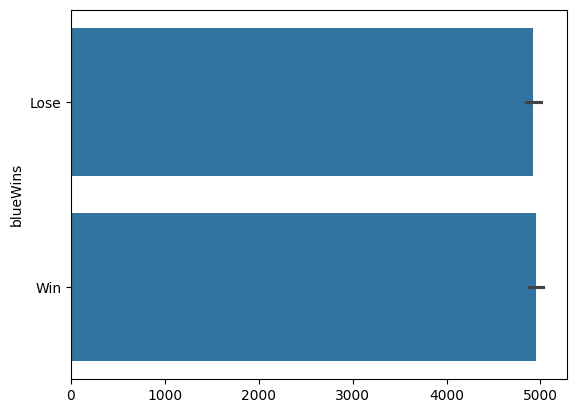

In [11]:
# Bar plot of the outcomes to see how they are distributed
data2 = data["blueWins"].replace([1,0],["Win","Lose"])
#data2.head()
sns.barplot(data2)

In [12]:
# Value counts data blueWins
data_bluwins = data[data["blueWins"]!=0]
total_wins = data_bluwins["blueWins"].count()
Total = data["blueWins"].count()
print("Total Blue Wins = ", total_wins)
print("Total Pertandingan = ",Total)
print("Percentasi Menang : ", (total_wins/Total))

Total Blue Wins =  4930
Total Pertandingan =  9879
Percentasi Menang :  0.4990383642069035


* Catatan
1. Time Blue 4930 kali menang dari 9879 total pertandingan dengan persentasi kemenangan 49.9%


In [13]:
y = data["blueWins"].values
X = data.drop(["blueWins"], axis=1).values

# Buatlah catatan dari hasil data preprocessing

#### Importing required libraries

In [44]:
from imblearn import under_sampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X,y)

## 3. Data Splitting into train and test set

In [33]:
random_state = 42
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay,roc_auc_score,roc_curve,RocCurveDisplay
x_train, x_test, y_train, y_test = train_test_split(X_under,y_under,test_size=0.2, random_state=random_state)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7888, 15)
(1972, 15)
(7888,)
(1972,)


## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [16]:
#from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR

In [17]:

# estimator = SVR(kernel="linear")
# rfe = RFE(estimator=estimator, n_features_to_select=2)
# rfe.fit(x_train,y_train)

In [18]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7888, 15)
(1972, 15)
(7888,)
(1972,)


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
#feature selection data train
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
print("DT Model Accuracy = ", dt_model.score(x_test, y_test))

DT Model Accuracy =  0.6298174442190669


In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
#feature selection data train
rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=2)
rfe.fit(x_train,y_train)
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
print("DT Model Accuracy = ", dt_model.score(x_test, y_test))

DT Model Accuracy =  0.6343813387423936


In [47]:
from sklearn.ensemble import RandomForestClassifier
ft_model = RandomForestClassifier(n_estimators=5, random_state=1)
ft_model.fit(x_train,y_train)
print("RF Model Accuracy = ", ft_model.score(x_test,y_test))

RF Model Accuracy =  0.6820486815415822


In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rfeRF = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfeRF.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=2)

In [24]:
ft_model = RandomForestClassifier(n_estimators=5, random_state=1)
ft_model.fit(x_train,y_train)
print("RF Model Accuracy = ", ft_model.score(x_test,y_test))

RF Model Accuracy =  0.6820486815415822


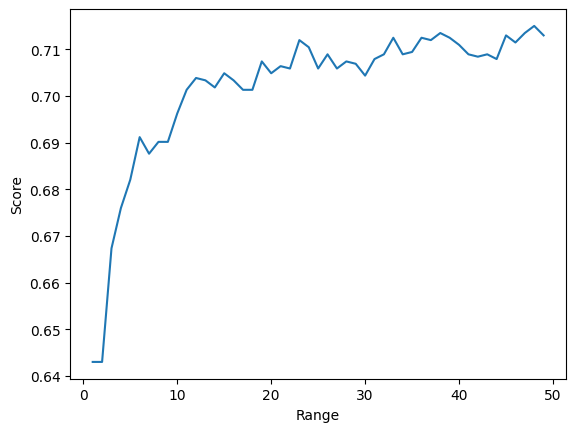

In [25]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

Feature Selection using Recursive feature extraction (RFE)

## 5. Modelling and Evaluation


In [53]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

In [54]:
#print score
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [74]:
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print_scores("=========Random Forest=========;",y_test, ft_model.predict(x_test))


=========Decision Tree=========;
accuracy:  0.6343813387423936
precision:  0.6197604790419161
recall:  0.6462018730489074
f1_score:  0.6344160323885794
=========Random Forest=========;
accuracy:  0.6820486815415822
precision:  0.6721649484536083
recall:  0.6784599375650364
f1_score:  0.6820788644403917


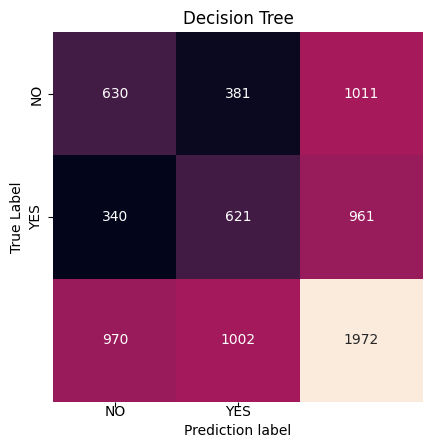

In [75]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

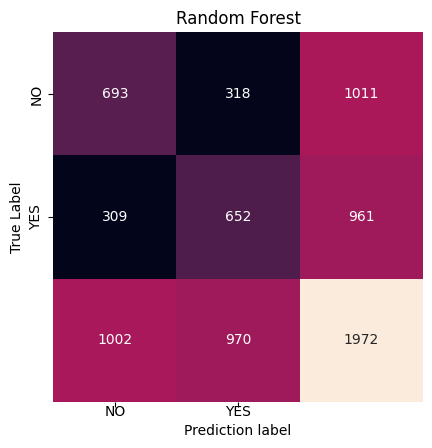

In [76]:
model_evaluation(ft_model.predict(x_test),"Random Forest")

* Summary
1. Analisis yang dilakukan pada data permainan dalam 10 menit, saya fokus statistik ke tim biru karena tim tersebut yang akan di analisis kemenangan.
2. setelah di lakukan cleaning data dan permodelan, saya menemukan model yang terbaik dalam kumpulan data tersebut adalah Random Forest.